In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/VihanGamage/news-popularity-prediction-AI/refs/heads/main/framingham_heart_study.csv?token=GHSAT0AAAAAAC275YOJ4NMVJDOWS6LTBZU2Z3RMYIA')
data.dropna(inplace=True)
X = data.drop(columns=['TenYearCHD'])
y = data['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)



Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7771 - loss: 0.5390 - val_accuracy: 0.8601 - val_loss: 0.3838
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8372 - loss: 0.4231 - val_accuracy: 0.8567 - val_loss: 0.3788
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8298 - loss: 0.4149 - val_accuracy: 0.8515 - val_loss: 0.3844
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8485 - loss: 0.3833 - val_accuracy: 0.8498 - val_loss: 0.3846
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8555 - loss: 0.3788 - val_accuracy: 0.8515 - val_loss: 0.3849
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8446 - loss: 0.3846 - val_accuracy: 0.8584 - val_loss: 0.3895
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8590 - loss: 0.3677 - val_accuracy: 0.8567 - val_loss: 0.3840
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8458 - loss: 0.3935 - val_accuracy: 0.8532 - val_loss: 0.3829
Epo

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Predict on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Test Accuracy: 82.92%
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy Score: 0.8292349726775956


In [ ]:
# Add a sample row for prediction
sample_data = pd.DataFrame({
    'male': [0],
    'age': [35],
    'education': [1],
    'currentSmoker': [1],
    'cigsPerDay': [20],
    'BPMeds': [1],
    'prevalentStroke': [1],
    'prevalentHyp': [1],
    'diabetes': [1],
    'totChol': [240],
    'sysBP': [150],
    'diaBP': [95],
    'BMI': [35],
    'heartRate': [55],
    'glucose': [105]
})

# Preprocess the sample row
sample_data_scaled = scaler.transform(sample_data)

# Predict the outcome for the sample data
sample_prediction = model.predict(sample_data_scaled)
predicted_outcome = (sample_prediction > 0.5).astype("int32")

print(f"\nSample Data Prediction: {predicted_outcome[0][0]} (1 = CHD likely, 0 = CHD unlikely)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Sample Data Prediction: 0 (1 = CHD likely, 0 = CHD unlikely)


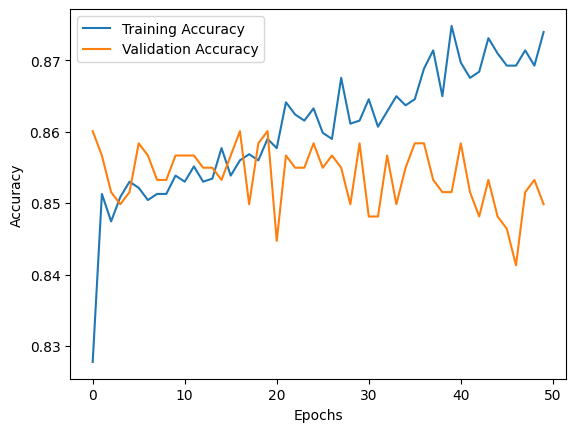

In [ ]:

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
